In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import*

In [2]:
def x(N,h,psi0,Jx,Jy,Jz):
    si = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
        op_list = []
        for m in range(N):
            op_list.append(si)

        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sy
        sy_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))

    H = 0

    for n in range(N):
        H += -0.5*h[n]*sx_list[n]

    for n in range(N-1):
        H += - 0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += - 0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += - 0.5 * Jz[n] * sz_list[n] * sz_list[n+1]
    H +=  - 0.5 * Jx[N-1] * sx_list[N-1] * sx_list[0]
    H +=  - 0.5 * Jy[N-1] * sy_list[N-1] * sy_list[0]
    H +=  - 0.5 * Jz[N-1] * sz_list[N-1] * sz_list[0]
    return H.eigenenergies()       

In [3]:
N  = 10
h  = 0.1 * 2 * np.pi * np.ones(N) 
Jz = 1.0 * 2 * np.pi * np.ones(N)
Jx = 0.0 * 2 * np.pi * np.ones(N)
Jy = 0.0 * 2 * np.pi * np.ones(N)

psi_list = []
psi_list.append(basis(2,0))

for n in range(N-1):
    psi_list.append(basis(2,0))
psi0 = tensor(psi_list)

band = np.zeros([20,2**N])



for m in range(20):
    h = 0.1*m* 2 * np.pi * np.ones(N)
    band[m,:] = x(N,h,psi0,Jx,Jy,Jz)
    

In [4]:
band.shape

(20, 1024)

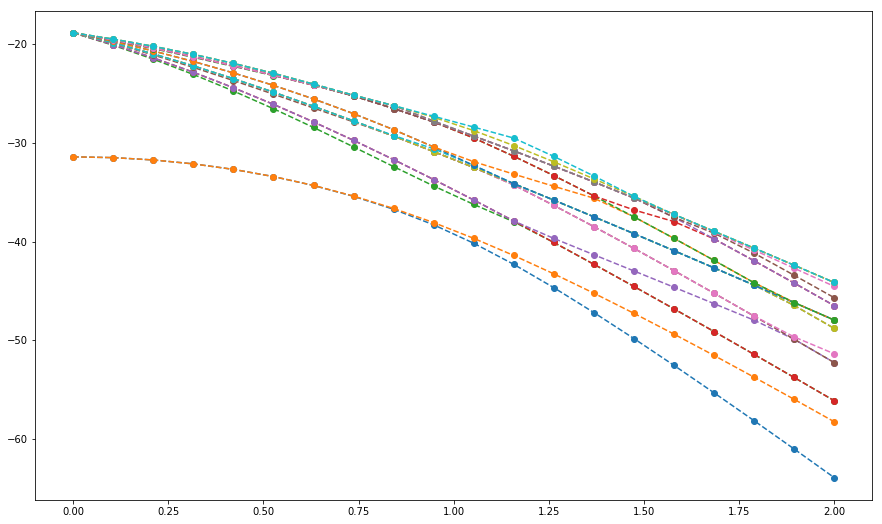

In [7]:
t = np.linspace(0,2,20)

fig,ax = plt.subplots(figsize=(15,9))

ax.clear()
for n in range(20):
    ax.plot(t,band[:,n],'o--')

2